In [39]:
# here we will import the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 


from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import KFold # for cross validation
from sklearn.model_selection import GridSearchCV # for tuning parameter
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hyper parameters.
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics # for the check the error and accuracy of the model
import time
from sklearn import tree
from sklearn.metrics import accuracy_score, make_scorer,confusion_matrix,f1_score,roc_auc_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn import metrics
from sklearn import tree


In [100]:
from sklearn import tree
from sklearn import svm
from sklearn.metrics import accuracy_score,roc_curve, auc, confusion_matrix


In [40]:
df=pd.read_csv("C:/Users/dell/Desktop/Nouveau dossier/e_learning/UCI_Credit_Card.csv")


In [41]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [42]:
df.rename(columns = {'default.payment.next.month':'default'}, inplace=True)

In [43]:
df.loc[(df['EDUCATION']==5) | (df['EDUCATION']==6) | (df['EDUCATION']==0),'EDUCATION']=4

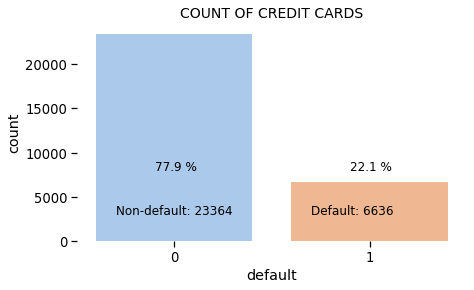

In [44]:
yes = df.default.sum()
no = len(df)-yes

# Percentage
yes_perc = round(yes/len(df)*100, 1)
no_perc = round(no/len(df)*100, 1)

import sys 
plt.figure(figsize=(7,4))
sns.set_context('notebook', font_scale=1.2)
sns.countplot('default',data=df, palette="pastel")
plt.annotate('Non-default: {}'.format(no), xy=(-0.3, 15000), xytext=(-0.3, 3000), size=12)
plt.annotate('Default: {}'.format(yes), xy=(0.7, 15000), xytext=(0.7, 3000), size=12)
plt.annotate(str(no_perc)+" %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=12)
plt.annotate(str(yes_perc)+" %", xy=(0.7, 15000), xytext=(0.9, 8000), size=12)
plt.title('COUNT OF CREDIT CARDS', size=14)
#Removing the frame
plt.box(False);

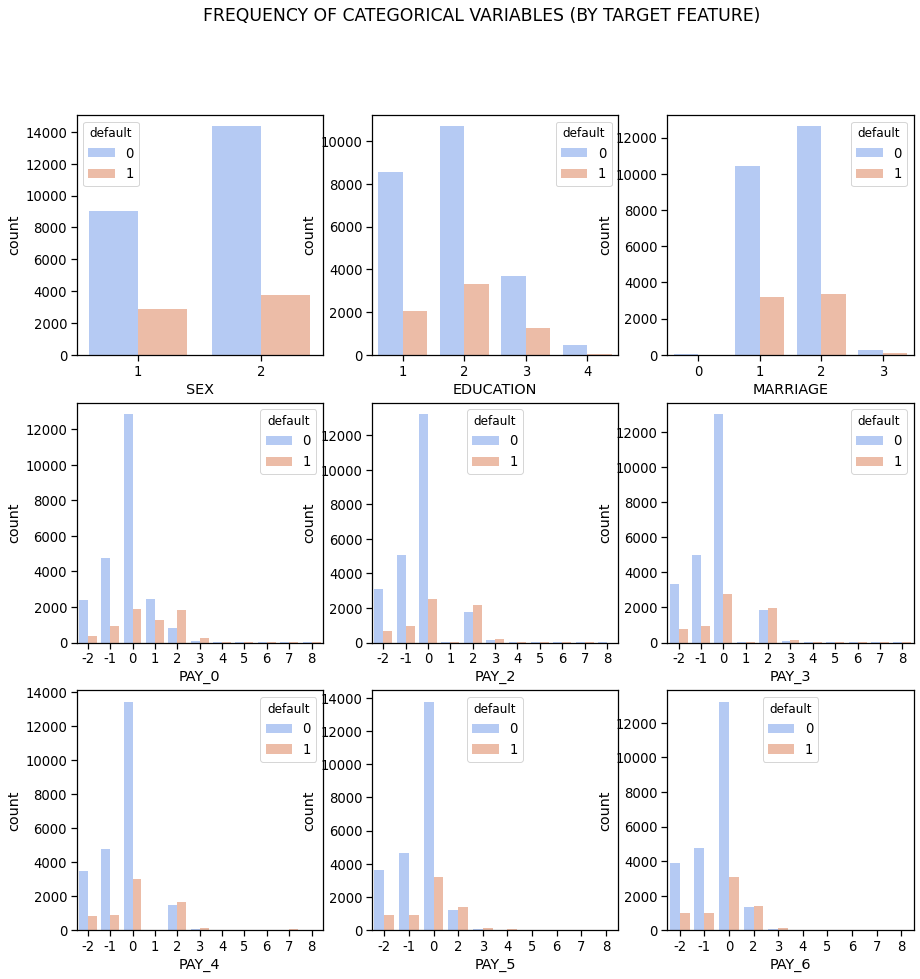

In [45]:
subset = df[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 
               'PAY_5', 'PAY_6', 'default']]
import seaborn as sns # used for plot interactive graph. 

f, axes = plt.subplots(3, 3, figsize=(15, 15), facecolor='white')
f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET FEATURE)')
ax1 = sns.countplot(x="SEX", hue="default", data=subset, palette="coolwarm", ax=axes[0,0])
ax2 = sns.countplot(x="EDUCATION", hue="default", data=subset, palette="coolwarm",ax=axes[0,1])
ax3 = sns.countplot(x="MARRIAGE", hue="default", data=subset, palette="coolwarm",ax=axes[0,2])
ax4 = sns.countplot(x="PAY_0", hue="default", data=subset, palette="coolwarm", ax=axes[1,0])
ax5 = sns.countplot(x="PAY_2", hue="default", data=subset, palette="coolwarm", ax=axes[1,1])
ax6 = sns.countplot(x="PAY_3", hue="default", data=subset, palette="coolwarm", ax=axes[1,2])
ax7 = sns.countplot(x="PAY_4", hue="default", data=subset, palette="coolwarm", ax=axes[2,0])
ax8 = sns.countplot(x="PAY_5", hue="default", data=subset, palette="coolwarm", ax=axes[2,1])
ax9 = sns.countplot(x="PAY_6", hue="default", data=subset, palette="coolwarm", ax=axes[2,2])

Text(0.5, 1.0, 'LIMIT BALANCE HISTOGRAM BY TYPE OF CREDIT CARD')

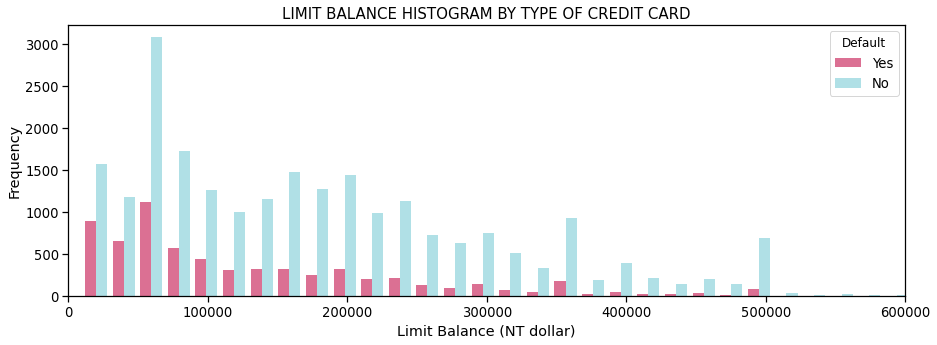

In [46]:
x1 = list(df[df['default'] == 1]['LIMIT_BAL'])
x2 = list(df[df['default'] == 0]['LIMIT_BAL'])

plt.figure(figsize=(15,5))
plt.hist([x1, x2], bins = 50,  color=['palevioletred', 'powderblue'])
plt.xlim([0,600000])
plt.legend(['Yes', 'No'], title = 'Default', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance (NT dollar)')
plt.ylabel('Frequency')
plt.title('LIMIT BALANCE HISTOGRAM BY TYPE OF CREDIT CARD', SIZE=15)


Text(0.5, 1.0, 'CORRELATION MATRIX-HEATMAP')

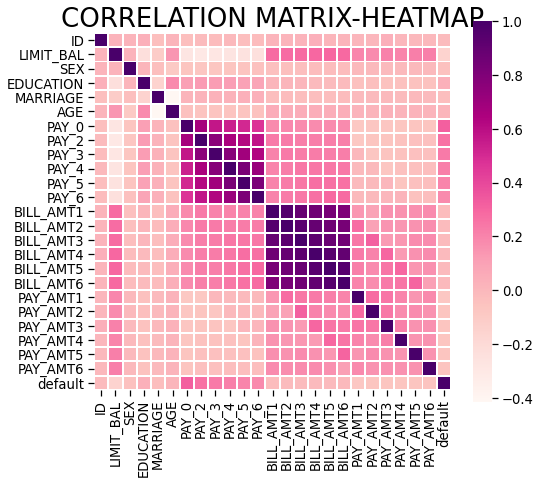

In [47]:
corr = df.corr() # .corr is used to find corelation
f,ax = plt.subplots(figsize=(8, 7))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f', 
            xticklabels= True, yticklabels= True
                ,cmap="RdPu", linewidths=1, ax=ax)
plt.title('CORRELATION MATRIX-HEATMAP', size=26)

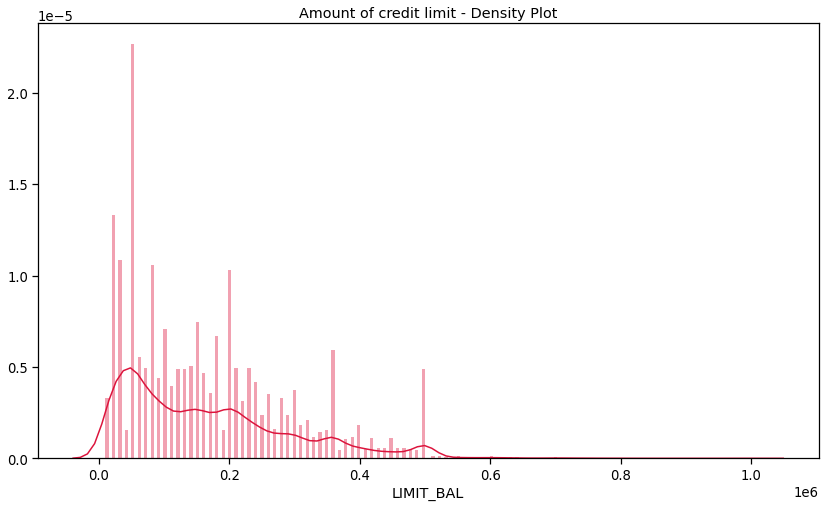

In [48]:
plt.figure(figsize = (14,8))
plt.title('Amount of credit limit - Density Plot')
sns.set_color_codes()
sns.distplot(df['LIMIT_BAL'],kde=True,bins=200, color="crimson")
plt.show()

In [49]:
y=df['default']
X = df.drop('default', axis=1)  

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

In [51]:
prediction=dict()
prediction

{}

# Arbre de decision (decision tree)

In [52]:
tree = DecisionTreeClassifier(criterion= 'entropy', max_depth= 7, 
                                     max_features= 9, min_samples_leaf= 2, 
                                     random_state=0)
import time
depart=time.time()

# Fit it to the data
tree.fit(X_train, y_train)
complexité_DT=time.time()-depart
y_pred_DT = tree.predict(X_test)


In [53]:
print('Accuracy Arbre de decision:', metrics.accuracy_score(y_pred_DT,y_test))


Accuracy Arbre de decision: 0.8103333333333333


Text(0.5, 1.0, 'Confusion Matrix - Decision Tree')

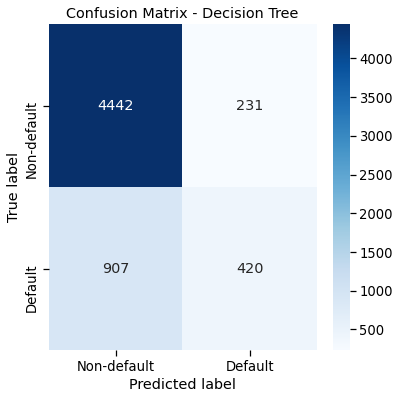

In [54]:
plt.figure(figsize=(6,6))
ConfMatrix = confusion_matrix(y_test,tree.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Decision Tree")

In [55]:
print(classification_report(y_test, y_pred_DT))


              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4673
           1       0.65      0.32      0.42      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.63      0.66      6000
weighted avg       0.79      0.81      0.78      6000



In [56]:
import os

In [57]:
y_pred_proba_DT = tree.predict_proba(X_test)[::,1]
fpr_DT, tpr_DT, _ = metrics.roc_curve(y_test,  y_pred_proba_DT)
auc_DT = metrics.roc_auc_score(y_test, y_pred_proba_DT)

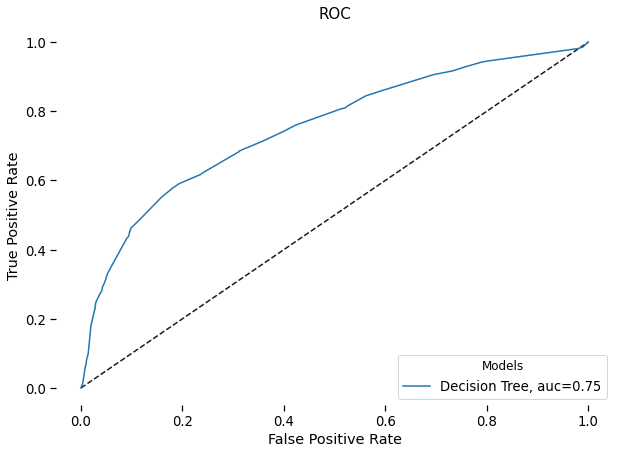

In [61]:
plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_DT,tpr_DT,label="Decision Tree, auc="+str(round(auc_DT,2)))
plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=False)

[Text(1116.0, 951.3000000000001, 'X[6] <= 1.5\nentropy = 0.762\nsamples = 24000\nvalue = [18691, 5309]'),
 Text(558.0, 679.5, 'X[7] <= 1.5\nentropy = 0.649\nsamples = 21506\nvalue = [17935, 3571]'),
 Text(279.0, 407.70000000000005, 'X[19] <= 1637.0\nentropy = 0.591\nsamples = 19672\nvalue = [16868, 2804]'),
 Text(139.5, 135.89999999999998, 'entropy = 0.717\nsamples = 7644\nvalue = [6133, 1511]'),
 Text(418.5, 135.89999999999998, 'entropy = 0.492\nsamples = 12028\nvalue = [10735, 1293]'),
 Text(837.0, 407.70000000000005, 'X[10] <= 1.0\nentropy = 0.981\nsamples = 1834\nvalue = [1067, 767]'),
 Text(697.5, 135.89999999999998, 'entropy = 0.95\nsamples = 1273\nvalue = [803, 470]'),
 Text(976.5, 135.89999999999998, 'entropy = 0.998\nsamples = 561\nvalue = [264, 297]'),
 Text(1674.0, 679.5, 'X[12] <= 2207.5\nentropy = 0.885\nsamples = 2494\nvalue = [756, 1738]'),
 Text(1395.0, 407.70000000000005, 'X[8] <= -0.5\nentropy = 0.999\nsamples = 220\nvalue = [114, 106]'),
 Text(1255.5, 135.89999999999

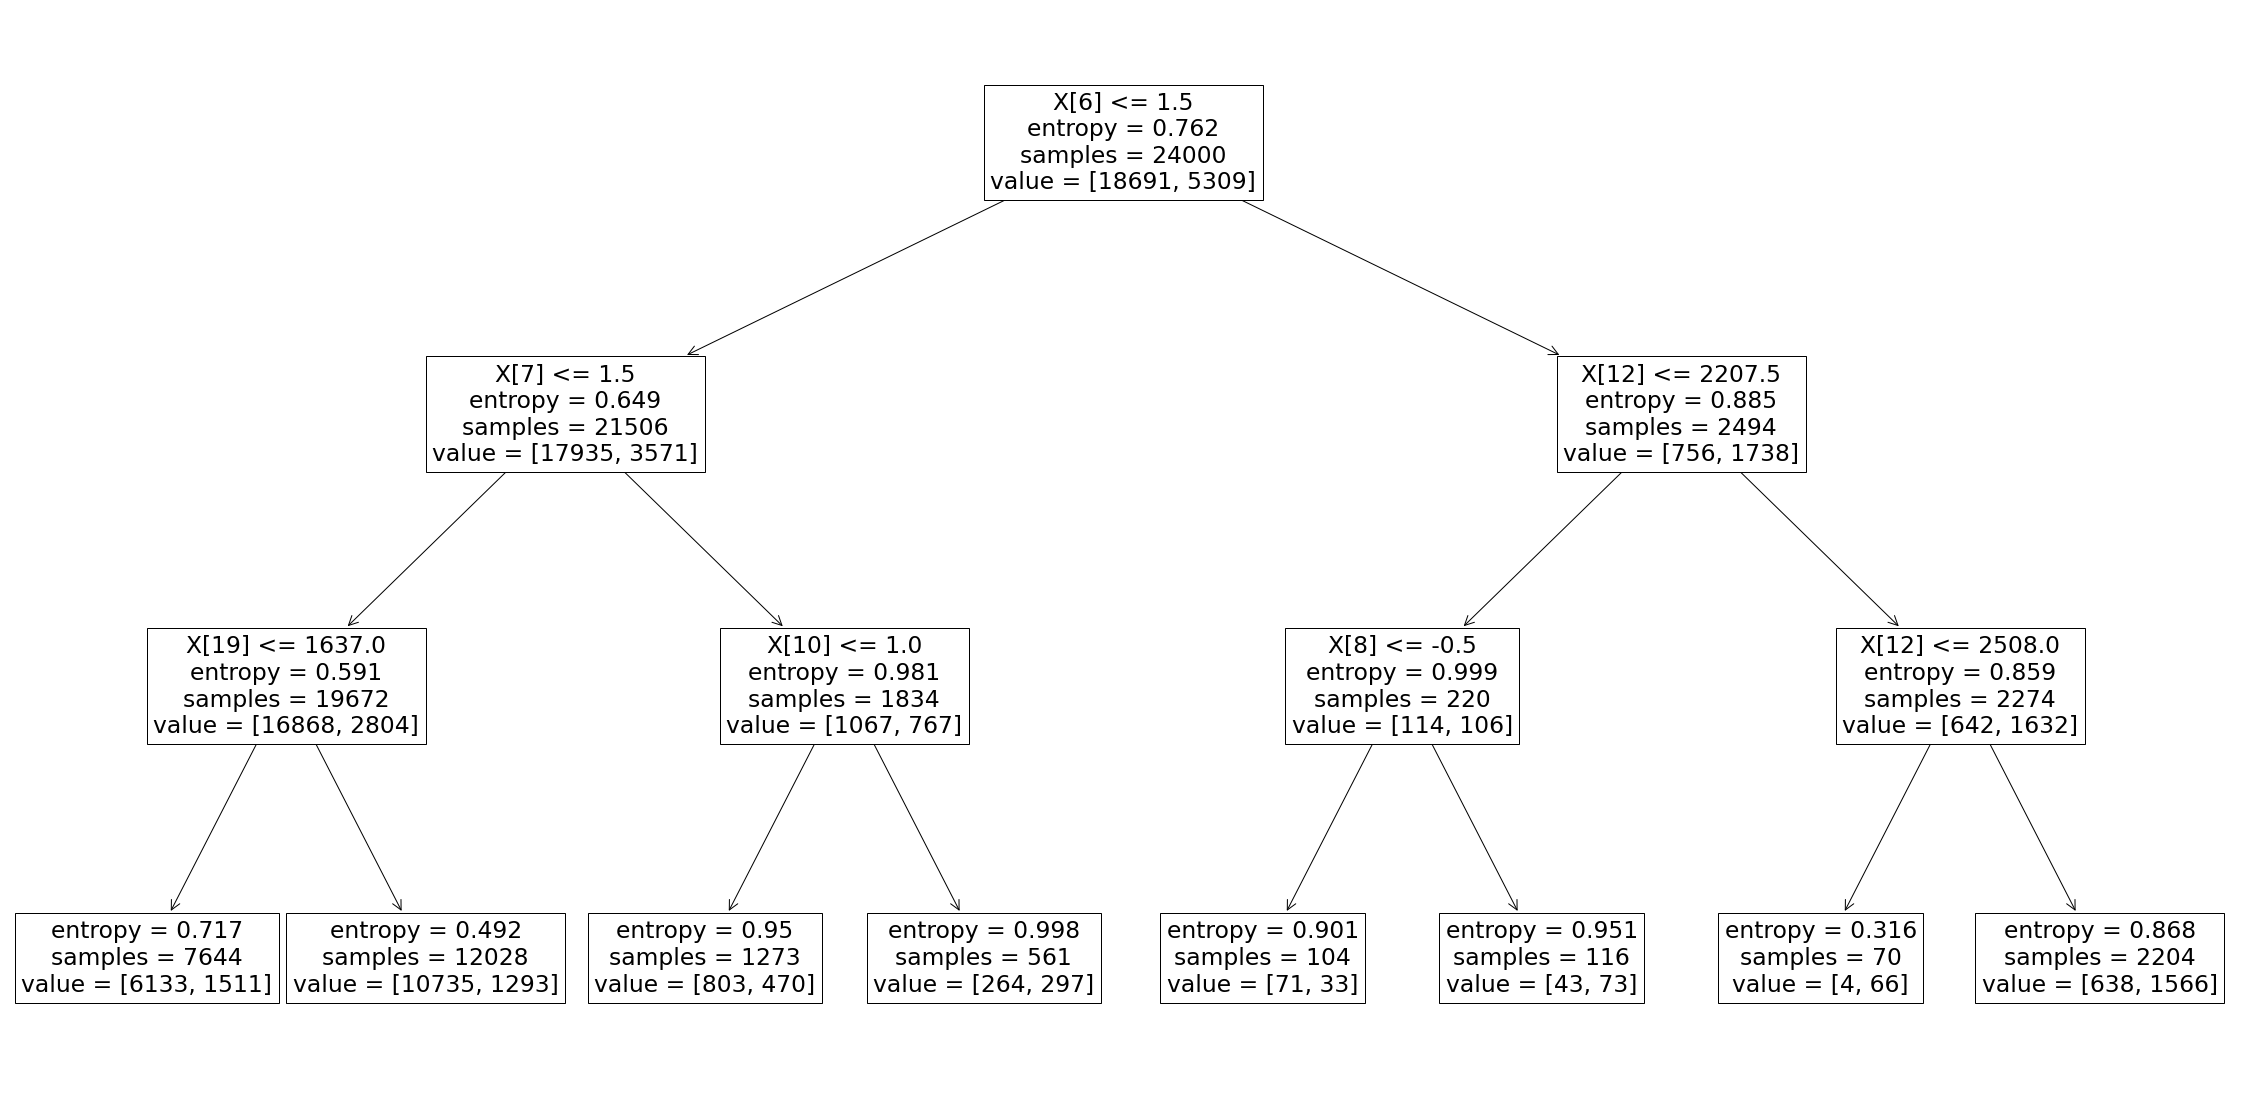

In [62]:
clf_DT=DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=3,min_samples_leaf=5)
clf_DT.fit(X_train,y_train)
plt.figure(figsize=(40,20))

tree.plot_tree(clf_DT) 

# Forêt aleatoire (Random Forest)

In [63]:
rf = RandomForestClassifier(criterion= 'entropy', max_depth= 7,n_estimators= 150, 
                                     max_features= 9, min_samples_leaf= 2, 
                                     random_state=0)

depart_RF=time.time()
rf.fit(X_train, y_train)
complexité_RF=time.time()-depart_RF
y_pred_RF = rf.predict(X_test)


In [64]:
complexité_RF

10.989882946014404

In [65]:
print('Accuracy:', metrics.accuracy_score(y_pred_RF,y_test))


Accuracy: 0.8188333333333333


In [66]:
print(classification_report(y_test, y_pred_RF))


              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.67      0.35      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.76      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



Text(0.5, 1.0, 'Confusion Matrix - Random Forest')

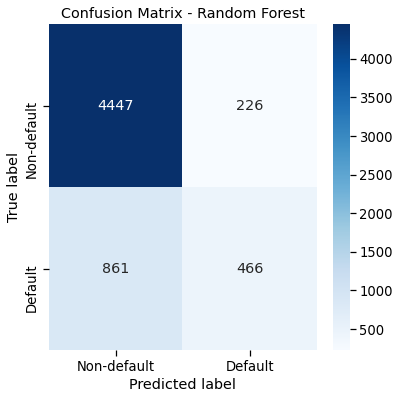

In [67]:
plt.figure(figsize=(6,6))
ConfMatrix = confusion_matrix(y_test,rf.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Random Forest")

In [68]:
y_pred_proba_RF= rf.predict_proba(X_test)[::,1]
fpr_RF, tpr_RF, _ = metrics.roc_curve(y_test,  y_pred_proba_RF)
auc_RF = metrics.roc_auc_score(y_test, y_pred_proba_RF)

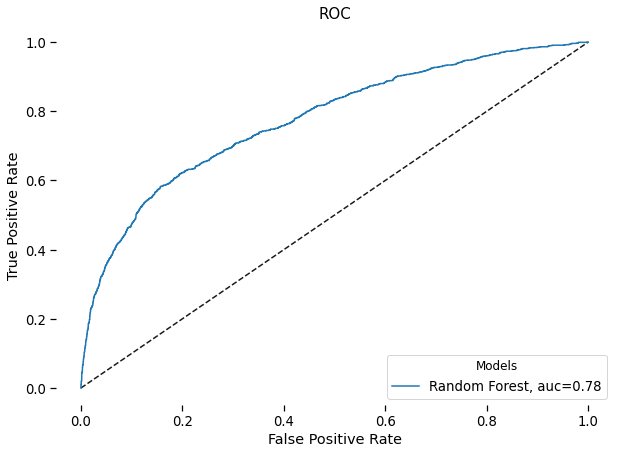

In [69]:
plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_RF,tpr_RF,label="Random Forest, auc="+str(round(auc_RF,2)))
plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=False)

# Regression Logistique


In [70]:
reglog= LogisticRegression(random_state=0)
depart_reg=time.time()
reglog.fit(X_train, y_train)
complexité_reg=time.time()-depart_reg
y_pred_reg = reglog.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred_reg,y_test))


Accuracy: 0.7788333333333334


E:\anaconda\envs\TP_DataScience\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
complexité_reg

0.4284229278564453

In [72]:
print(classification_report(y_test, y_pred_reg))


              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4673
           1       0.00      0.00      0.00      1327

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.68      6000



E:\anaconda\envs\TP_DataScience\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression')

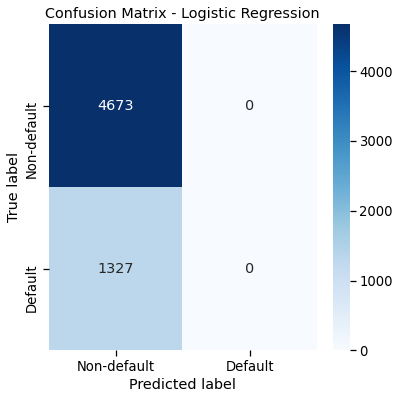

In [73]:
plt.figure(figsize=(6,6))
ConfMatrix = confusion_matrix(y_test,reglog.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression")

In [74]:
y_pred_proba_reg= reglog.predict_proba(X_test)[::,1]
fpr_reg, tpr_reg, _ = metrics.roc_curve(y_test,  y_pred_proba_reg)
auc_reg = metrics.roc_auc_score(y_test, y_pred_proba_reg)

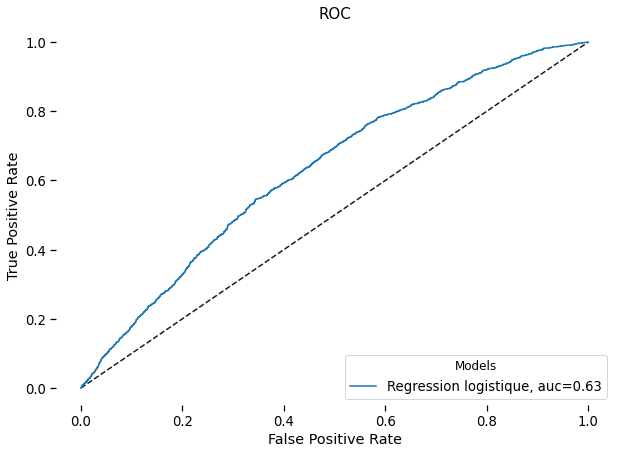

In [75]:
plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_reg,tpr_reg,label="Regression logistique, auc="+str(round(auc_reg,2)))
plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=False)

# XGBOOST

In [76]:
 
# instantiate the classifier 
clf_xgb = XGBClassifier(objective='binary:logistic',
            max_depth= 4,
            alpha=10,
            learning_rate= 1.0,
            n_estimators=100)


# fit the classifier to the training data
depart_xgb=time.time()
clf_xgb.fit(X_train, y_train)
complexité_xgb=time.time()-depart_xgb

In [77]:
complexité_xgb

1.4628612995147705

In [78]:
y_pred_xgb = clf_xgb.predict(X_test)


In [79]:
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_xgb)))


XGBoost model accuracy score: 0.8117


In [80]:
print(classification_report(y_test, y_pred_xgb))


              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.62      0.37      0.47      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.65      0.68      6000
weighted avg       0.79      0.81      0.79      6000



Text(0.5, 1.0, 'Confusion Matrix - XGBOOST')

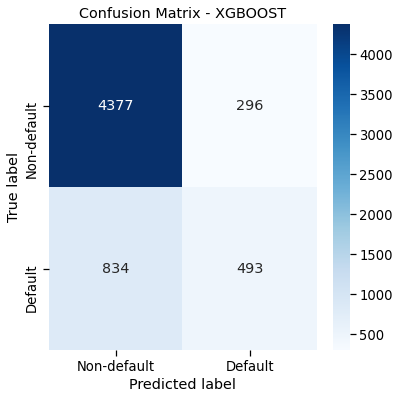

In [81]:
plt.figure(figsize=(6,6))
ConfMatrix = confusion_matrix(y_test,clf_xgb.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - XGBOOST")

In [82]:
y_pred_proba_xgb= clf_xgb.predict_proba(X_test)[::,1]
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(y_test,  y_pred_proba_xgb)
auc_xgb = metrics.roc_auc_score(y_test, y_pred_proba_xgb)

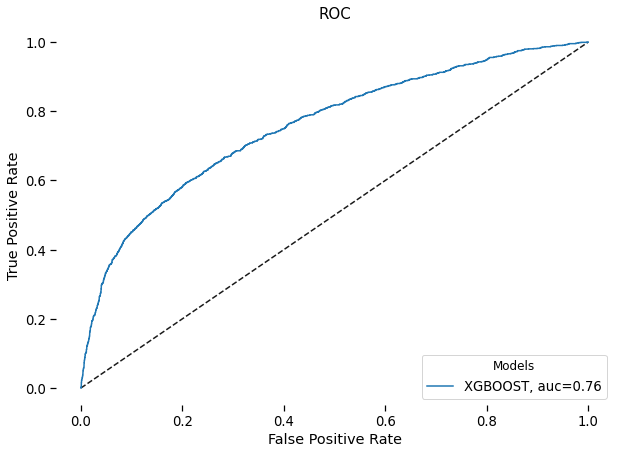

In [83]:
plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_xgb,tpr_xgb,label="XGBOOST, auc="+str(round(auc_xgb,2)))
plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=False)

#    KNeighbors

In [84]:
clf_kn=KNeighborsClassifier(metric = 'minkowski')
depart_kn=time.time()
clf_kn.fit(X_train, y_train)
complexité_kn=time.time()-depart_kn

In [85]:
y_pred_kn = clf_kn.predict(X_test)


In [86]:
complexité_kn

0.20132040977478027

In [87]:
print('KNeighnors model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_kn)))


KNeighnors model accuracy score: 0.7522


In [88]:
print(classification_report(y_test, y_pred_kn))


              precision    recall  f1-score   support

           0       0.80      0.92      0.85      4673
           1       0.37      0.18      0.24      1327

    accuracy                           0.75      6000
   macro avg       0.59      0.55      0.55      6000
weighted avg       0.70      0.75      0.72      6000



Text(0.5, 1.0, 'Confusion Matrix - KNeighbors')

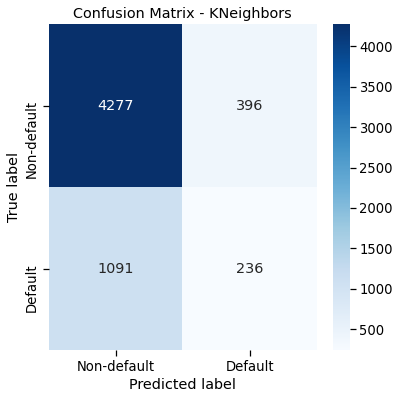

In [89]:
plt.figure(figsize=(6,6))
ConfMatrix = confusion_matrix(y_test,clf_kn.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - KNeighbors")

In [90]:
y_pred_proba_kn= clf_kn.predict_proba(X_test)[::,1]
fpr_kn, tpr_kn, _ = metrics.roc_curve(y_test,  y_pred_proba_kn)
auc_kn = metrics.roc_auc_score(y_test, y_pred_proba_kn)

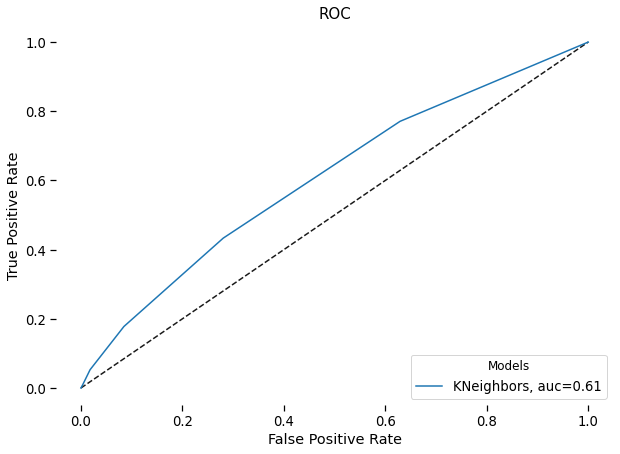

In [91]:
plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_kn,tpr_kn,label="KNeighbors, auc="+str(round(auc_kn,2)))
plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=False)

# Support Vector Machine 

In [92]:
clf_svc =SVC(random_state = 1, kernel = 'rbf',probability=True)    
depart_svc=time.time()
clf_svc.fit(X_train, y_train)
complexité_svc=time.time()-depart_svc

In [93]:
complexité_svc

135.92520785331726

In [94]:
y_pred_svc= clf_svc.predict(X_test)


In [95]:
print('SVM (rbf kernel) model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_svc)))


SVM (rbf kernel) model accuracy score: 0.7788


In [96]:
print(classification_report(y_test, y_pred_svc))


              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4673
           1       0.00      0.00      0.00      1327

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.68      6000



E:\anaconda\envs\TP_DataScience\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Confusion Matrix - SVM rbf')

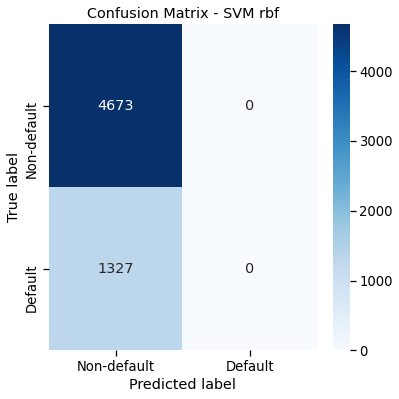

In [97]:
plt.figure(figsize=(6,6))
ConfMatrix = confusion_matrix(y_test,clf_svc.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - SVM rbf")

In [ ]:
y_pred_proba_svc= clf_svc.predict_proba(X_test)[::,1]
fpr_svc, tpr_svc, _ = metrics.roc_curve(y_test,  y_pred_proba_svc)
auc_svc = metrics.roc_auc_score(y_test, y_pred_proba_svc)

In [ ]:
plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_xgb,tpr_xgb,label="svm rbf, auc="+str(round(auc_svm,2)))
plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=False)

In [98]:
y_pred_proba_svc= clf_svc.predict_proba(X_test)[::,1]
fpr_svc, tpr_svc, _ = metrics.roc_curve(y_test,  y_pred_proba_svc)
auc_svc = metrics.roc_auc_score(y_test, y_pred_proba_svc)

In [ ]:
plt.figure(figsize=(15,9))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_RF,tpr_RF,label="Random Forest, auc="+str(round(auc_RF,2))+str(", Complexité de calcul=")+str(round(complexité_RF,3)))
plt.plot(fpr_DT,tpr_DT,label="Decision Tree, auc="+str(round(auc_DT,2))+str(", Complexité de calcul=")+str(round(complexité_DT,3)))
plt.plot(fpr_reg,tpr_reg,label="LogReg, auc="+str(round(auc_reg,2))+str(", Complexité de calcul=")+str(round(complexité_reg,3)))
plt.plot(fpr_xgb,tpr_xgb,label="XGBOOST, auc="+str(round(auc_xgb,2))+str(", Complexité de calcul=")+str(round(complexité_xgb,3)))
plt.plot(fpr_kn,tpr_kn,label="KNeighbors, auc="+str(round(auc_kn,2))
+str(", Complexité de calcul=")+str(round(complexité_kn,3)))
plt.plot(fpr_svc,tpr_svc,label="SVM rbf, auc="+str(round(auc_svc,2))+str(", Complexité de calcul=")+str(round(complexité_svc,3)))

plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.savefig('ImageName', format='png', dpi=200, transparent=True)

In [ ]:
clf_svc_ln =SVC(random_state = 1, kernel = 'lineair',probability=True)    
depart_svc_ln=time.time()
clf_svc_ln.fit(X_train, y_train)
complexité_svc_ln=time.time()-depart_svc_ln

In [ ]:
y_pred_svc_ln= clf_svc_ln.predict(X_test)


In [ ]:
print('SVM (linear kernel) model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_svc_ln)))


In [ ]:
print(classification_report(y_test, y_pred_svc_ln))


In [ ]:
plt.figure(figsize=(6,6))
ConfMatrix = confusion_matrix(y_test,clf_svc_ln.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - SVM linear")

In [ ]:
y_pred_proba_sv_lnc= clf_svc_ln.predict_proba(X_test)[::,1]
fpr_svc_ln, tpr_svc_ln, _ = metrics.roc_curve(y_test,  y_pred_proba_svc_ln)
auc_svc_ln = metrics.roc_auc_score(y_test, y_pred_proba_svc_ln)